In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cftime
import dask
import xarrayutils
import cartopy.crs as ccrs
from xmip.preprocessing import combined_preprocessing
from xmip.preprocessing import replace_x_y_nominal_lat_lon
from xmip.drift_removal import replace_time
from xmip.postprocessing import concat_experiments
import xmip.drift_removal as xm_dr
import xmip as xm
import xesmf as xe
import datetime
from dateutil.relativedelta import relativedelta
import utils
import scipy.signal as signal

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


import string
alphabet = list(string.ascii_lowercase)
          

## Data

Data for this is from https://gmd.copernicus.org/articles/11/1133/2018/ CDRMIP data, where pi-CO2pulse is the 100GtC pulse and piControl is the control

In [2]:
G_ds = xr.open_dataset('Outputs/G_pulse_ds.nc4')['__xarray_dataarray_variable__']
G_mean_ds = xr.open_dataset('Outputs/G_mean_ds.nc4')['__xarray_dataarray_variable__']
G_cdr_ds = xr.open_dataset('Outputs/G_cdr_ds.nc4')['__xarray_dataarray_variable__']
G_cdr_mean_ds = xr.open_dataset('Outputs/G_cdr_mean_ds.nc4')['__xarray_dataarray_variable__']

In [3]:
G_mean_ds = G_mean_ds.rename({'year':'s'})

In [4]:
A = utils.A

In [5]:
model_color = utils.model_color

## Test CO2 trajectories

In [6]:
plateau_drop_emis = np.append(np.linspace(7,10, 20),np.linspace(10,0,30))

In [7]:
increase_emis = np.linspace(7,22, 50)

In [8]:
plateau_out = signal.convolve(G_mean_ds.to_numpy(), plateau_drop_emis[..., None, None], 'full')
increase_out = signal.convolve(G_mean_ds.to_numpy(), increase_emis[..., None, None], 'full')

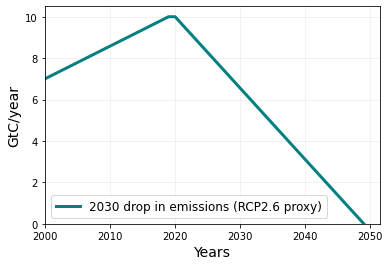

In [9]:
fig, ax =plt.subplots()
#plt.plot(increase_emis, label = 'Continuous increase (RCP8.5 proxy)', color = 'teal', linewidth = 3)
plt.plot(np.arange(2000,2050), plateau_drop_emis, label = '2030 drop in emissions (RCP2.6 proxy)', color = 'teal', linewidth = 3)
plt.legend(fontsize = 12)
plt.grid(alpha = 0.2)
plt.xlim(2000,None)
plt.ylim(0,None)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('GtC/year', fontsize = 14)
plt.savefig('figures/talks/emis_timeseries.pdf', bbox_inches = 'tight', dpi = 350)

In [10]:
plateau_out = utils.np_to_xr(plateau_out, G_mean_ds, plateau_drop_emis)
increase_out = utils.np_to_xr(increase_out, G_mean_ds, increase_emis)

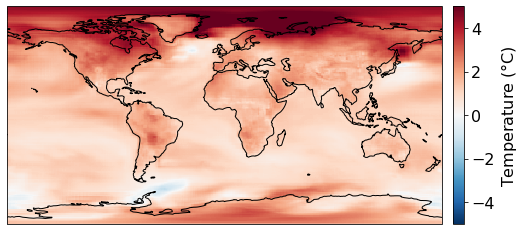

In [27]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize = [10,4])
fg = increase_out.sel(s = 50).plot(ax = ax, transform = ccrs.PlateCarree(), vmin = -5, vmax = 5, cmap = 'RdBu_r', 
                                   add_colorbar = False)
ax.coastlines()
plt.title('')

cbar = ax.figure.colorbar(fg, ax=ax, pad=0.02)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='Temperature ($\degree$C)', size=16)

plt.savefig('figures/talks/conv_50_yrs_mean.png', bbox_inches = 'tight', dpi = 350)

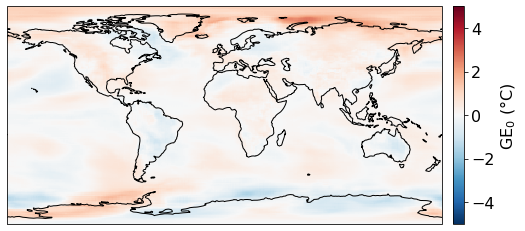

In [25]:
fig, ax= plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, figsize = [10,4])
fg = (G_mean_ds.isel(s = 50)*100).plot(ax = ax, transform = ccrs.PlateCarree(), vmin = -5, vmax = 5, cmap = 'RdBu_r', add_colorbar = False)
ax.coastlines()
cbar = ax.figure.colorbar(fg, ax=ax, pad=0.02)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='GE$_0$ ($\degree$C)', size=16)
plt.title('')
plt.savefig('figures/talks/G_50_yrs_mean.png', bbox_inches = 'tight', dpi = 350)